## Aglomerative Hierarchical Clustering

Working with Mall-Customers dataset. 

Source - Kaggle 

We would form clusters based on only two feartures: Annual Income and Spending Score

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

In [7]:
data = pd.read_csv('Mall_Customers.csv')

In [8]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
data.rename(columns={'Genre':'Gender'}, inplace=True)

In [10]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
data.shape

(200, 5)

There are 200 observations and 5 features.

In [12]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

All the data are numerical in nature.

In [13]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no null values in the dataset.

In [14]:
## Since we would work only with Annual Income and Spending Score, we would drop all other features.
data.drop(['CustomerID', 'Gender', 'Age'], axis=1, inplace=True)

In [15]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Aglomerative Clustering 

Text(0.5, 1.0, 'Dendrogram')

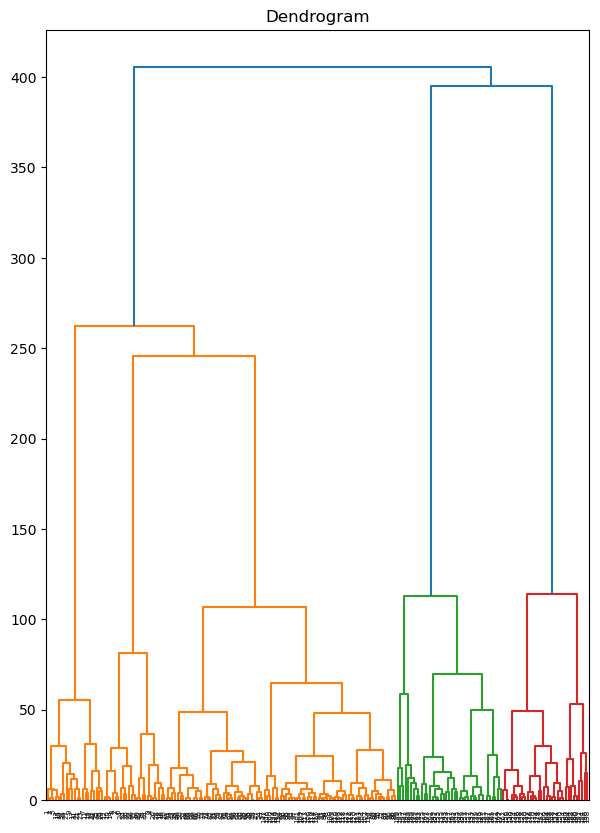

In [16]:
## To construct a dendogram

import scipy.cluster.hierarchy as dnd

plt.figure(figsize=(7,10))
dnd.dendrogram(dnd.linkage(data, method='ward'))
plt.title('Dendrogram')

To find the optimal number of clusters we need to find the longest vertical line in the dendogram through which no horizontal line passes. Now we can imagine a horizontal line passinging through that longest vertical line. The number of intersections the imaginary horizontal line will make with the vertical lines of the dendogram will be the optimal number of clusters. By that we find that the optimal number of clusters is 5. Thus we would construct our model making 5 clusters of the mall customers.

In [17]:
## Model building

from sklearn.cluster import AgglomerativeClustering

clusters = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clusters.fit(data)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [18]:
Cluster = clusters.labels_

In [19]:
Cluster

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [20]:
data['Cluster'] = pd.DataFrame(Cluster, columns=['Cluster'])

In [21]:
data.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


The 'Cluster' column shows the cluster in which each of the observations or customer in the dataset belongs.

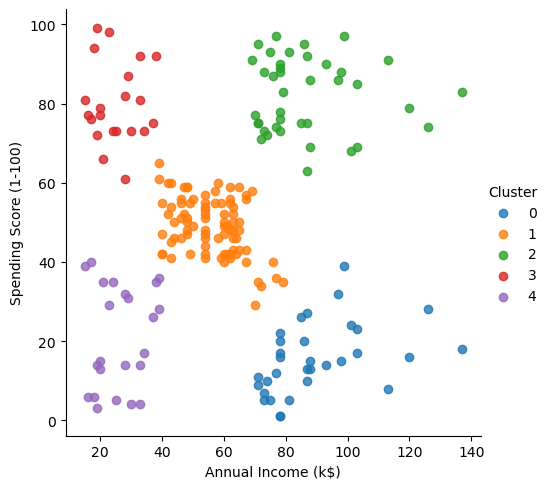

In [22]:
# Visualizing the clusters on the graph.
sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, fit_reg=False, hue='Cluster')